# Imperfection

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from qmap import *
from IPython.html.widgets import *
from IPython.display import HTML, Image
from matplotlib import animation, rc
from tqdm import tqdm
from copy import deepcopy
import seaborn as sns
sns.set_style("whitegrid")
rc('animation', html='html5')

/home/lepisma/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
T = 100
P = 20

output = "../../Cloud/Courses/691q/project/presentation/images"

In [4]:
def pl(g):
    M = 5
    noise = 0.2
    markings = get_markings(T, P) # Get oracle output for 100 iterations and 20 items
    markings = mark_all(markings, num=M) # Mark num items
#     markings = unmark_one(markings, g) # Unmark one at given pos
    markings = unmark_all_noise(markings, [noise for i in range(P)], start=20)
    plot_mem(run(markings), markings,
             f"M={M}, N={P}. NOISE {noise}", "tmp.pdf", M)

In [5]:
interact(pl, g=(0, 40))

interactive(children=(IntSlider(value=20, description='g', max=40), Output()), _dom_classes=('widget-interact',))

<function __main__.pl>

## Noise markings mean plots

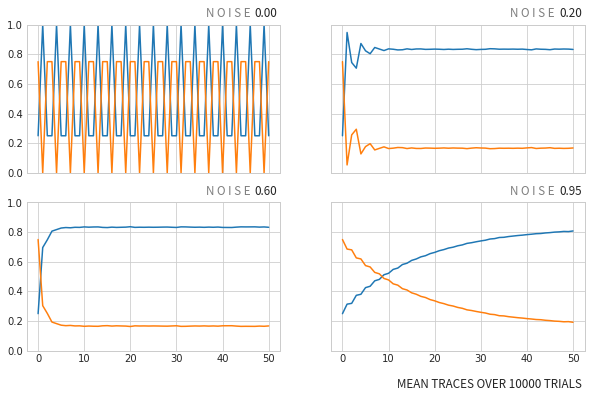

In [161]:
mems_map = {}

probs = [0.0, 0.2, 0.6, 0.95]
for p in tqdm(probs):
    mems = []
    for i in range(10000):
        markings = get_markings(50, P)
        markings = mark_all(markings, num=5)
        markings = unmark_all_noise(markings, [p for j in range(5)], start=0)
        mem = run(markings)
        mems.append(mem)
    mems = np.array(mems)
    mems_map[p] = deepcopy(mems)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

def prob_success(mem):
    ps = (mem ** 2).mean(axis=0) # 50, P
    return ps[:,:5].sum(axis=1)

def prob_fail(mem):
    ps = prob_success(mem)
    return 1 - ps

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.plot(prob_success(mems_map[probs[i]]))
    ax.plot(prob_fail(mems_map[probs[i]]))
    ax.set_ylim([0, 1.0])
    ax.text(46, 1.05, f"N O I S E", name="Source Sans Pro", size=13,
            ha="right", color="gray")
    ax.text(47, 1.05, f"{probs[i]:.2f}", name="Source Sans Pro", size=13, ha="left")

plt.text(52, -0.25, f"MEAN TRACES OVER 10000 TRIALS",
         name="Source Sans Pro", size=13, ha="right")
    
plt.setp([a.get_xticklabels() for a in f.axes[:-2]], visible=False)
plt.savefig(f"{output}/trace-all.pdf")

## Histograms for noisy strategy

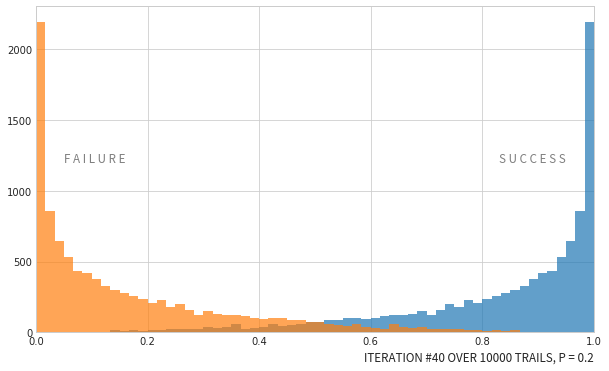

In [150]:
p = probs[1]
iteration = 40
fig = plt.figure(figsize=(10, 6))
succ_hist = (mems_map[p] ** 2)[:, :, :5].sum(axis=-1)
fail_hist = (mems_map[p] ** 2)[:, :, 5:].sum(axis=-1)
plt.hist(succ_hist[:, iteration], bins=60,range=(0,1), alpha=0.7)
plt.hist(fail_hist[:, iteration], bins=60,range=(0,1), alpha=0.7)
plt.text(0.05, 1200, "F A I L U R E", color="gray", name="Source Sans Pro", size=13)
plt.text(0.95, 1200, "S U C C E S S", color="gray", name="Source Sans Pro",
         size=13, ha="right")
plt.text(1.00, -200, f"ITERATION #{40} OVER 10000 TRAILS, P = {p}",
         name="Source Sans Pro", size=13, ha="right")
plt.legend()
plt.xlim([0, 1])
plt.savefig(f"{output}/trace-dist.pdf")

## Trace for varying probabilities

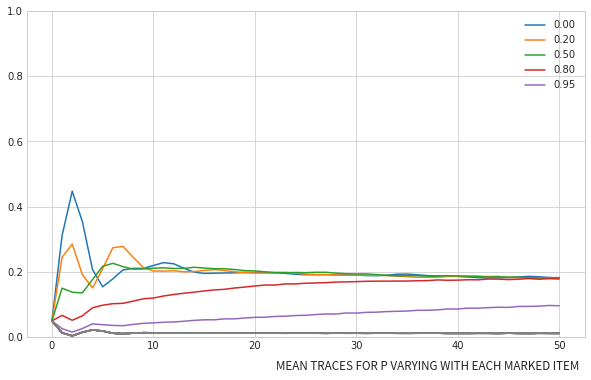

In [162]:
vprobs = [0.0, 0.2, 0.5, 0.8, 0.95]

mems = []
for i in tqdm(range(10000)):
    markings = get_markings(50, P)
    markings = mark_all(markings, num=5)
    markings = unmark_all_noise(markings, vprobs, start=0)
    mem = run(markings)
    mems.append(mem)
mems = np.array(mems)

fig = plt.figure(figsize=(10, 6))

for i, p in enumerate(vprobs):
    plt.plot((mems ** 2)[:, :, i].mean(axis=0), label=f"{p:.2f}")
    
for i in range(len(vprobs), P):
    plt.plot((mems ** 2)[:, :, i].mean(axis=0), color="gray")

plt.text(52, -0.1, f"MEAN TRACES FOR P VARYING WITH EACH MARKED ITEM",
         name="Source Sans Pro", size=13, ha="right")

plt.ylim([0, 1.0])
plt.legend()
plt.savefig(f"{output}/trace-varying.pdf")

## Histogram for varying probability

/home/lepisma/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'SourceCodePro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


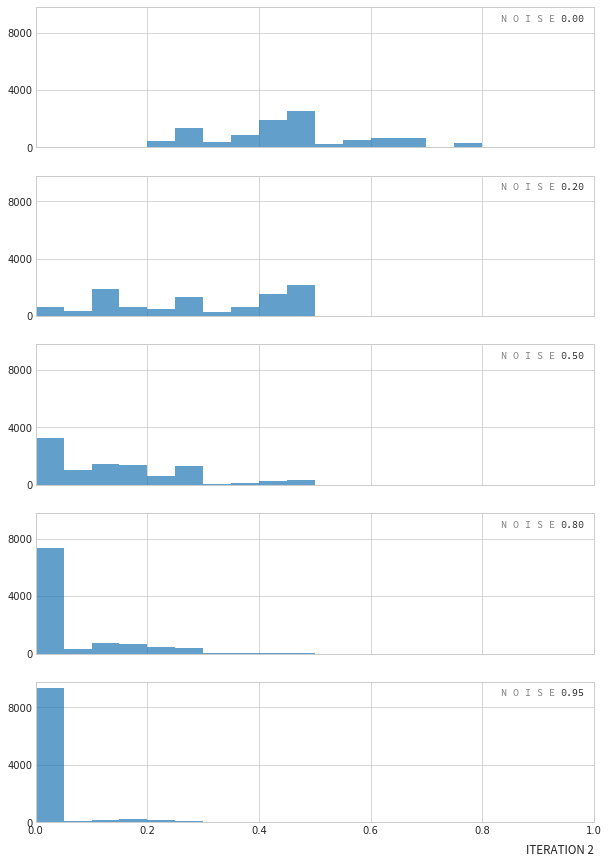

In [168]:
iteration = 2
fig, axes = plt.subplots(5, figsize=(10, 15), sharex=True, sharey=True)
for i in range(len(vprobs)):
    succ_hist = (mems ** 2)[:, :, i]
    axes[i].hist(succ_hist[:, iteration], bins=20,range=(0,1), alpha=0.7)
    axes[i].text(0.93, 8800, f"N O I S E", color="gray", name="Source Code Pro", ha="right")
    axes[i].text(0.94, 8800, f"{vprobs[i]:.2f}", name="Source Code Pro", ha="left")

plt.xlim([0, 1])
plt.yticks([4000 * i for i in range(3)])
plt.text(1.0, -2200, f"ITERATION {iteration}", size=13, name="Source Sans Pro", ha="right")
plt.savefig(f"{output}/trace-dist-varying.pdf")